In [ ]:
#!pip install nltk 
#!pip install pyldavis 
#!pip install stanza
#!pip install wordcloud 
#!pip install openturns
!pip install -U setuptools
!pip install reliability
#!apt update && apt install -y libsm6 libxext6

In [ ]:
#https://towardsdatascience.com/exploratory-data-analysis-for-natural-language-processing-ff0046ab3571

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
DATA_PATH = '../../data/virtual-operator'
TRAIN_DATASET = os.path.join(DATA_PATH, 'train.csv')
VAL_DATASET = os.path.join(DATA_PATH, 'val.csv')
TEST_DATASET  = os.path.join(DATA_PATH, 'test.csv')

In [4]:
def read_data(filename):
    data = pd.read_csv(filename, sep=";", names =['utterance','label'], header=None, dtype={'utterance':str, 'label': str} )
    return data

In [5]:
train_data = read_data(TRAIN_DATASET)
val_data = read_data(VAL_DATASET)
test_data = read_data(TEST_DATASET)
full_dataset = pd.concat([train_data, val_data, test_data], ignore_index=True)
train_val_dataset = pd.concat([train_data, val_data], ignore_index=True)
full_dataset.head()

,utterance,label
0,para visita técnica,Sintomas.Genérico.Sky não funciona
1,instalaçao,Sintomas.Genérico.Instalação
2,essa minha parabólica tá pegando só um canal o...,Sintomas.Genérico.Canal não pega
3,falta ausencia de sinal em algum canal do cana...,Sintomas.Genérico.Canal não pega
4,é o aparelho zapper nao tá funcionando,Sintomas.Genérico.Equipamento não funciona G


In [6]:
print(len(train_data))
print(len(val_data))
print(len(test_data))

482348
53595
133986


In [7]:
len(full_dataset)

669929

### Remove data from labels containing less then 10 examples:

In [8]:
bytag = full_dataset.groupby('label').aggregate(np.count_nonzero)
#tags = bytag[bytag.utterance >= 10].index
data = full_dataset[full_dataset['label'].isin(bytag)]

In [43]:
bytag

,utterance
label,
Sintomas.Genérico.Atualização de endereço G,381
Sintomas.Genérico.Canal Globo não pega,1521
Sintomas.Genérico.Canal HD não pega G,3483
Sintomas.Genérico.Canal adulto não pega (G),171
Sintomas.Genérico.Canal comum não pega (G),6000
Sintomas.Genérico.Canal não pega,29835
Sintomas.Genérico.Canal opcional não pega,1109
Sintomas.Genérico.Canal travado,2385
Sintomas.Genérico.Código sim,336


In [9]:
bytag = full_dataset.groupby('label').aggregate(np.count_nonzero)
df_qty_label = bytag.sort_values(by='utterance', ascending=False)
print(df_qty_label)

                                               utterance
label                                                   
Sintomas.Genérico.Sem sinal                        72762
Sintomas.Qualificado.Ausência de sinal             50791
Sintomas.Genérico.Problema com equipamento         48223
Sintomas.Genérico.Sky não funciona                 41785
Sintomas.Genérico.Falar com atendente              41309
...                                                  ...
Sintomas.Qualificado.Ativar closed caption            33
Sintomas.Qualificado.Áudio atrasado                   32
Sintomas.Genérico.Problema com closed caption         20
Sintomas.Qualificado.Msg carregando conteúdo          14
Sintomas.Qualificado.Número da OS                     11

[121 rows x 1 columns]


In [10]:
pd.set_option('display.max_rows', 130)
pd.set_option('display.max_colwidth', None)
print(df_qty_label[0:121])

                                                                  utterance
label                                                                      
Sintomas.Genérico.Sem sinal                                           72762
Sintomas.Qualificado.Ausência de sinal                                50791
Sintomas.Genérico.Problema com equipamento                            48223
Sintomas.Genérico.Sky não funciona                                    41785
Sintomas.Genérico.Falar com atendente                                 41309
Sintomas.Genérico.Problema com imagem                                 33027
Sintomas.Genérico.Canal não pega                                      29835
Sintomas.Genérico.Troca de equipamento                                18686
Sintomas.Genérico.Problema com canal                                  17736
Sintomas.Qualificado.Mudança de endereço                              16715
Sintomas.Qualificado.Banda larga                                      12948
Sintomas.Gen

In [48]:
pd.set_option('display.max_rows', 130)
pd.set_option('display.max_colwidth', None)
dd = full_dataset[full_dataset['label'].isin(['Sintomas.Qualificado.Equipamento liga e desliga sozinho'])]
dd.head(100)

,utterance,label
58,já faz uma semana que está dando uma mensagem na tela dizendo que está perdendo o sinal do satélite falta de comunicaçao e voce assiste normal de repente carlos final fica tudo a tela azul e já estou aparelho da sky se desliga,Sintomas.Qualificado.Equipamento liga e desliga sozinho
471,o aparelho liga e desliga sozinho várias vezes no dia,Sintomas.Qualificado.Equipamento liga e desliga sozinho
538,é no caso o aparelho desligou inesperadamente acho que ele queimou,Sintomas.Qualificado.Equipamento liga e desliga sozinho
639,entao o aparelho militar desligando e ligando desligando e ligando tá esquentando muito e nao para ligado,Sintomas.Qualificado.Equipamento liga e desliga sozinho
714,o aparelho está desligando sozinha perdendo sinal sozinho de repente nao sei por qual motivo,Sintomas.Qualificado.Equipamento liga e desliga sozinho
1202,sbt o que a tela tá preta tá sem sinal e a gente nao consegue ligar e desliga o aparelho o aparelho desliga,Sintomas.Qualificado.Equipamento liga e desliga sozinho
1286,meu aparelho está fazendo para configurar de novo parcelamento,Sintomas.Qualificado.Equipamento liga e desliga sozinho
1336,oi a respeito do aparelho que ele está desligando sozinho só volta ao normal quando tira da tomada e liga novamente,Sintomas.Qualificado.Equipamento liga e desliga sozinho
1540,o meu aparelho tá ligando e desligando,Sintomas.Qualificado.Equipamento liga e desliga sozinho
1576,o aparelho da sky que desligou e nao liga mais,Sintomas.Qualificado.Equipamento liga e desliga sozinho


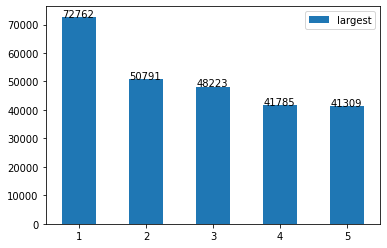

In [11]:
largest_qtys = [72762,50791,48223,41785,41309] 
smallest_qtys = [33,32,20,14,11]
index = [1,2,3,4,5]
df2 = pd.DataFrame({'largest': largest_qtys}, index = index)
ax = df2.plot.bar(figsize=(6,4),rot=0)
x_offset = -0.2
y_offset = 0.2
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, (b.x0, b.y1 + y_offset))

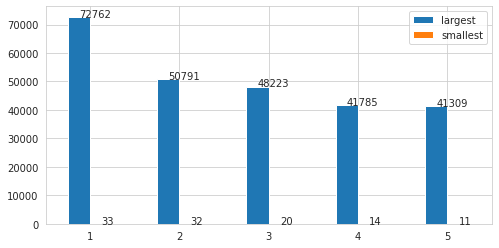

In [57]:
largest_qtys = [72762,50791,48223,41785,41309] 
smallest_qtys = [33,32,20,14,11]
index = [1,2,3,4,5]
df2 = pd.DataFrame({'largest': largest_qtys, 'smallest': smallest_qtys}, index = index)
ax = df2.plot.bar(figsize=(8,4),rot=0)
x_offset = 0
y_offset = 0.2
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

<AxesSubplot:>

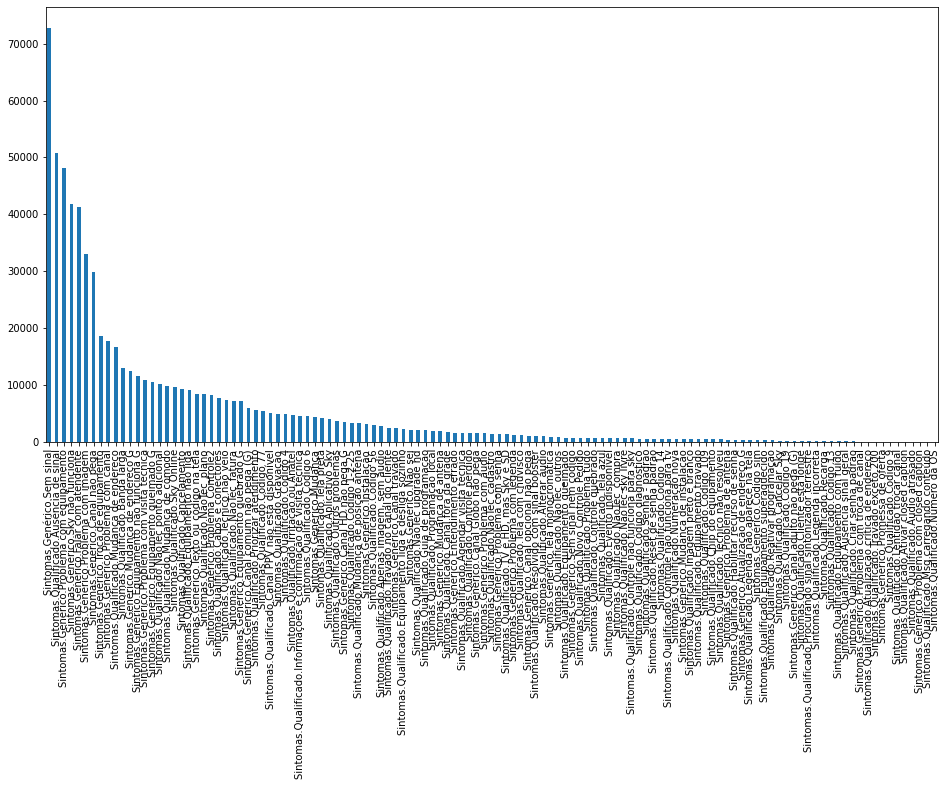

In [14]:
full_dataset.label.value_counts().plot.bar(figsize=(16,8))

###  Sentence size (token number) distribution

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


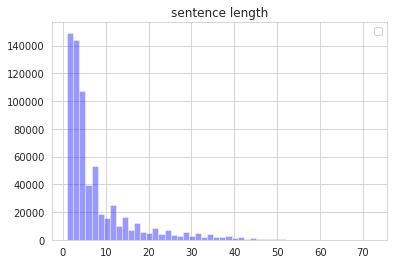

In [15]:
def getSentenceLen(str):
    import re
    try:
        return len(re.findall(r'\w+', str))
    except:
        return 0

sns.set_style("whitegrid")
length_checker = np.vectorize(getSentenceLen) 
sentence_len = length_checker(full_dataset['utterance']) 

sns.distplot(sentence_len,bins= 50, hist=True, kde=False, color='b')
plt.title('sentence length'); plt.legend()
plt.show()


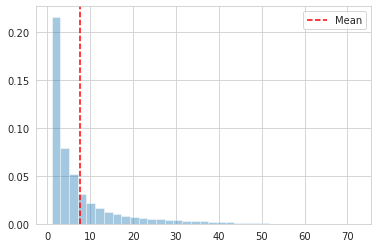

In [16]:
ax_hist = plt.subplot()
mean = sentence_len.mean()
#sentence_len.median()
#sentence_len.mode().get_values()[0]

sns.distplot(sentence_len, ax=ax_hist,bins= 35,kde=False,norm_hist=True)
ax_hist.axvline(mean, color='r', linestyle='--')
#ax_hist.axvline(median, color='g', linestyle='-')
#ax_hist.axvline(mode, color='b', linestyle='-')

#plt.legend({'Mean':mean,'Median':median,'Mode':mode})
plt.legend({'Mean':mean})
plt.show()

In [17]:
sentence_len.mean()

7.630457854489058

In [36]:
print('min seq len ', sentence_len.min())
print('max seq len ', sentence_len.max())
print('mean ', sentence_len.mean())
print('std dev ', sentence_len.std())

min seq len  1
max seq len  72
mean  7.630457854489058
std dev  8.639037182055324


In [19]:
import scipy.stats
from scipy.stats import *
from sklearn.preprocessing import StandardScaler

In [20]:
dist_names = ['expon','powerlaw','powerlognorm','powernorm','rayleigh']           

In [ ]:
sentence_df = pd.DataFrame(sentence_len, columns = ['length'])

In [ ]:
def standarise(data,pct,pct_lower):
    sc = StandardScaler() 
    y = data[data.notnull()].to_list()
    y.sort()
    len_y = len(y)
    y = y[int(pct_lower * len_y):int(len_y * pct)]
    len_y = len(y)
    yy=([[x] for x in y])
    sc.fit(yy)
    y_std =sc.transform(yy)
    y_std = y_std.flatten()
    return y_std,len_y,y

In [ ]:
??scipy.stats


In [ ]:
def fit_distribution(data,pct,pct_lower):
    # Set up list of candidate distributions to use
    # See https://docs.scipy.org/doc/scipy/reference/stats.html for more
    y_std,size,y_org = standarise(data,pct,pct_lower)
    dist_names = ['expon','exponnorm','lognorm','invgauss','gamma']      

    chi_square_statistics = []
    # 11 bins
    percentile_bins = np.linspace(0,100,9)
    percentile_cutoffs = np.percentile(y_std, percentile_bins)
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)
    
    # Loop through candidate distributions

    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)
        print("{}\n{}\n".format(dist, param))
      

        # Get expected counts in percentile bins
        # cdf of fitted sistrinution across bins
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range(len(percentile_bins)-1):
            expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
            expected_frequency.append(expected_cdf_area)

        # Chi-square Statistics
        expected_frequency = np.array(expected_frequency) * size
        #print(expected_frequency)
        cum_expected_frequency = np.cumsum(expected_frequency)
        ss = round(sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency),0)
        
        chi_square_statistics.append(ss)


    #Sort by minimum ch-square statistics
    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square_statistics
    results.sort_values(['chi_square'], inplace=True)


    print ('\nDistributions listed by Betterment of fit:')
    print ('............................................')
    print (results)

In [ ]:
fit_distribution(sentence_df['length'],100,0.0)

In [ ]:
y_std,len_y,y = standarise(sentence_df['length'],100,0.0)

In [ ]:
plt.hist(y)
plt.xlabel('Sentence length')
plt.ylabel('Qty')

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))
axes[0].hist(y)
axes[0].set_xlabel('Price\n\nHistogram plot of Oberseved Data')
axes[0].set_ylabel('Frequency')
axes[1].plot(y,expon.pdf(y_std,-0.7674996315864449, 0.7674996315864445))
axes[1].set_xlabel('Price\n\nExponential Distribution')
axes[1].set_ylabel('pdf')
axes[2].plot(y,exponnorm.pdf(y_std,3201.998494972814, -0.768323371749217, 0.00023872691759128635))
axes[2].set_xlabel('Price\n\nInverse-Gaussian Distribution')
axes[2].set_ylabel('pdf')
fig.tight_layout()

In [ ]:
f = plt.figure()
plt.plot(y,expon.pdf(y_std,-0.7674996315864449, 0.7674996315864445))
f.show()

In [ ]:
len(invgauss.pdf(y_std,0.45, -1.64, 3.61))

In [ ]:
f = plt.figure()
plt.plot(y,exponnorm.pdf(y_std,3201.998494972814, -0.768323371749217, 0.00023872691759128635))
f.show()

In [ ]:
data_points = expon.rvs(-0.7674996315864449, 0.7674996315864445, size=2000)   
data_points2 = exponnorm.rvs(3201.998494972814, -0.768323371749217, 0.00023872691759128635,size = 2000) 

f, ax = plt.subplots(figsize=(8,8))
ax.plot([-2, 8], [-2, 8], ls="--", c=".3")

percentile_bins = np.linspace(0,100,100)
percentile_cutoffs1 = np.percentile(y_std, percentile_bins)
percentile_cutoffs_expon= np.percentile(data_points, percentile_bins)


percentile_cutoffs_invgauss = np.percentile(data_points2, percentile_bins)


ax.scatter(percentile_cutoffs1,percentile_cutoffs_invgauss,c='r',label = 'Inverse-Gaussian Distribution',s = 40)
ax.scatter(percentile_cutoffs1,percentile_cutoffs_expon,c='b',label = 'Exponential Distribution',s = 40)


ax.set_xlabel('Theoretical cumulative distribution')
ax.set_ylabel('Observed cumulative distribution')
ax.legend()
plt.show()


In [ ]:
from reliability.Fitters import Fit_Exponential_2P
from reliability.Probability_plotting import Exponential_probability_plot, Weibull_probability_plot, Exponential_probability_plot_Weibull_Scale
import matplotlib.pyplot as plt

plt.subplot(131)
Exponential_probability_plot(failures=y)
plt.subplot(132)
Weibull_probability_plot(failures=y)
plt.subplot(133)
Exponential_probability_plot_Weibull_Scale(failures=y)
plt.gcf().set_size_inches(13, 6)
plt.subplots_adjust(left=0.06, right=0.97, top=0.91, wspace=0.30)  # format the plot
plt.show()

<AxesSubplot:>

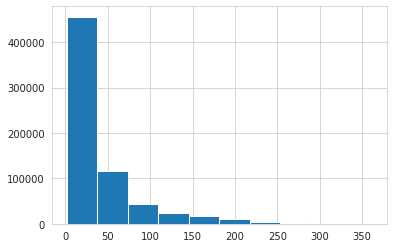

In [21]:
full_dataset['utterance'].str.len().hist()

<AxesSubplot:>

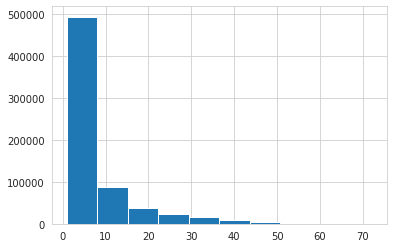

In [22]:
full_dataset['utterance'].str.split().\
    map(lambda x: len(x)).\
    hist()

<AxesSubplot:>

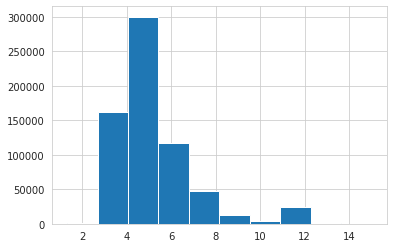

In [23]:
full_dataset['utterance'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [7]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
corpus=[]
new= full_dataset['utterance'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word]+=1

In [ ]:
len(corpus

<BarContainer object of 10 artists>

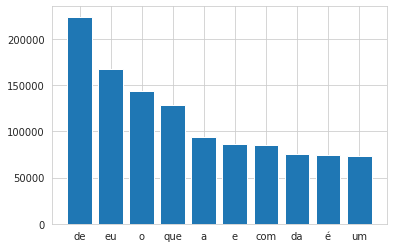

In [54]:
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

<AxesSubplot:>

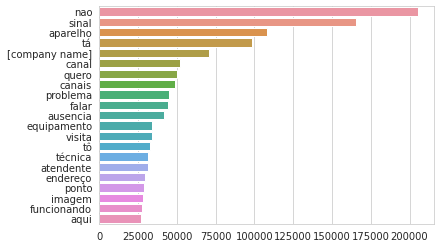

In [50]:
import collections
counter=collections.Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop_words):
        if (word == 'sky'):
            x.append('[company name]')
        else:
            x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

<AxesSubplot:>

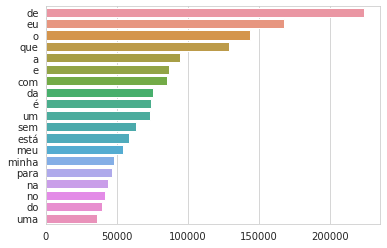

In [55]:
import collections
counter=collections.Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word in stop_words):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [28]:
# Code Snippet for Top N-grams Barchart

import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('portuguese'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

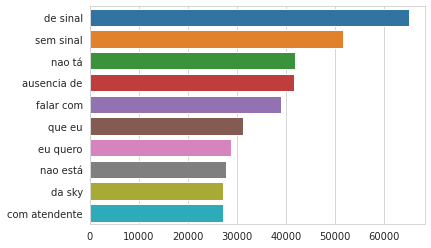

In [29]:
plot_top_ngrams_barchart(full_dataset['utterance'],2)

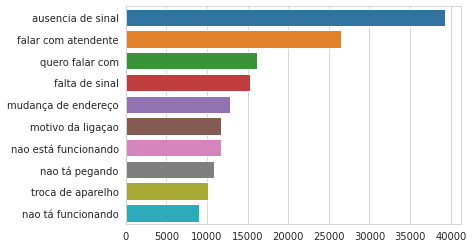

In [30]:
plot_top_ngrams_barchart(full_dataset['utterance'],3)

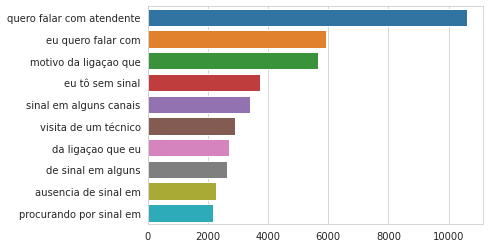

In [31]:
plot_top_ngrams_barchart(full_dataset['utterance'],4)

In [32]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import pyLDAvis.gensim
import stanza

stanza.download('pt')
nlp = stanza.Pipeline('pt')


def get_lda_objects2(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('portuguese'))
    def _preprocess_text(text):
        corpus=[]
        for news in text:
            for sent in nlp(news).sentences:
                words=[w.lemma for w in sent.words if (w.text not in stop and len(w.text) >2)]
                corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

2021-03-15 11:37:50 INFO: Downloading default packages for language: pt (Portuguese)...
2021-03-15 11:37:50 INFO: File exists: /root/stanza_resources/pt/default.zip.
2021-03-15 11:37:52 INFO: Finished downloading models and saved to /root/stanza_resources.
2021-03-15 11:37:52 INFO: Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| pos       | bosque  |
| lemma     | bosque  |
| depparse  | bosque  |

2021-03-15 11:37:53 INFO: Use device: gpu
2021-03-15 11:37:53 INFO: Loading: tokenize
2021-03-15 11:37:56 INFO: Loading: mwt
2021-03-15 11:37:56 INFO: Loading: pos
2021-03-15 11:37:57 INFO: Loading: lemma
2021-03-15 11:37:57 INFO: Loading: depparse
2021-03-15 11:37:58 INFO: Done loading processors!


In [ ]:
lda_model, bow_corpus, dic = get_lda_objects2(full_dataset['utterance'])

In [ ]:
lda_model.show_topics()

In [ ]:
plot_lda_vis(lda_model, bow_corpus, dic)

In [ ]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import pyLDAvis.gensim
import stanza

stanza.download('pt')
nlp = stanza.Pipeline('pt')


def getCorpus(text):
    nltk.download('stopwords')
    stop = stopwords.words('portuguese')
    def _preprocess_text(text):
        corpus=[]
        for news in text:
            for sent in nlp(news).sentences:
                words=[w.lemma for w in sent.words if (w.text not in stop and len(w.text) >2)]
                corpus.append(words)
        return corpus
    
    return _preprocess_text(text)

In [ ]:
from wordcloud import WordCloud
nltk.download('stopwords')
stop = stopwords.words('portuguese')

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

corpus=getCorpus(full_dataset['utterance'].head(10))

In [ ]:
corpus

In [ ]:
show_wordcloud(corpus)

In [ ]:
from reliability.Probability_plotting import Weibull_probability_plot, Exponential_probability_plot
from reliability.Distributions import Weibull_Distribution
import matplotlib.pyplot as plt

plt.subplot(121)
Weibull_probability_plot(failures=y)
plt.title('Example of a good fit')
plt.subplot(122)
Exponential_probability_plot(failures=y)
plt.title('Example of a bad fit')
plt.subplots_adjust(bottom=0.1, right=0.94, top=0.93, wspace=0.34)  # adjust the formatting
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from six.moves import urllib
import zipfile
from scipy import stats

list_of_dists = ['alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','weibull_min','weibull_max','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max']
results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(sentence_df['length'])
    a = stats.kstest(sentence_df['length'], i, args=param)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))